In [1]:
%run create_4LAC_for_AGN_Pop.ipynb

Total number of 4LAC entries found in the 4FGL: 3511
Total number of 4LAC entries: 3511
Added a total of 3511 redshifts. 1767 had positive values.
 -- From Paolo's catalog -- 
A total of 0 redshifts were correct within 4LAC
Removed a total of 87 redshifts from 4LAC
Added a total of 23 redshifts to 4LAC
Updated a total of 236 redshifts of 4LAC


List of column names: agn_pop_catalog

 ['Source_Name', 'RAJ2000', 'DEJ2000', 'Redshift', 'SpectrumType', 'Pivot_Energy', 'PL_Flux_Density', 'PL_Index', 'LP_Flux_Density', 'LP_Index', 'LP_beta', 'SED_class', 'Variability_Index', 'Frac_Variability', 'Unc_Frac_Variability', 'Flux1000', 'Unc_Flux1000', 'Flux_History', 'Unc_Flux_History']

Number of table rows: 3511


In [2]:
catalog_data = agn_pop_catalog['Source_Name', 'SpectrumType', 'Pivot_Energy', 'PL_Flux_Density', 'PL_Index', 'LP_Flux_Density', 'LP_Index', 'LP_beta', 'SED_class', 'Flux1000', 'Unc_Flux1000', 'Frac_Variability', 'Unc_Frac_Variability']

catalog_data

Source_Name,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,SED_class,Flux1000,Unc_Flux1000,Frac_Variability,Unc_Frac_Variability
str18,str17,float32,float32,float32,float32,float32,float32,str3,float32,float32,float32,float32
J0001.2+4741,PowerLaw,2514.9417,1.9206343e-14,2.2221549,1.893531e-14,2.2337143,-0.008456561,ISP,1.2159239e-10,3.2066936e-11,0.69284904,0.40699458
J0001.2-0747,PowerLaw,1612.6141,3.3465656e-13,2.1049428,3.5833494e-13,2.0718932,0.04876986,LSP,8.2320506e-10,5.6777423e-11,0.33279318,0.108399756
J0001.5+2113,LogParabola,355.78442,3.9051106e-11,2.659308,4.532746e-11,2.5481505,0.15877607,ISP,1.3590526e-09,6.8598856e-11,1.0545832,0.24980173
J0001.6-4156,PowerLaw,4009.3838,2.0757042e-14,1.7558894,2.3474046e-14,1.6675872,0.06975478,HSP,3.0486913e-10,3.4296448e-11,0.32796606,0.17213507
J0002.1-6728,PowerLaw,3689.1895,1.8744873e-14,1.846469,2.3711413e-14,1.6778738,0.16372891,,2.4168523e-10,3.0690155e-11,0.30663496,0.19210596
J0002.3-0815,PowerLaw,3959.9126,7.564005e-15,1.9895958,9.510118e-15,1.9282347,0.15012589,LSP,1.1693464e-10,3.32925e-11,0.31231728,0.72063845
...,...,...,...,...,...,...,...,...,...,...,...,...
J2359.0+3922,PowerLaw,1621.9188,1.1973475e-13,2.3477888,1.1708454e-13,2.3640099,-0.017356092,LSP,2.7603766e-10,4.0250227e-11,0.8606212,0.25553405
J2359.0-3038,PowerLaw,3703.5862,3.3936805e-14,1.8187637,3.5061916e-14,1.7988403,0.017256342,HSP,4.3815906e-10,4.2386882e-11,0.15399826,0.17869046


In [3]:
np.unique(catalog_data['SED_class'])

""
HSP
ISP
LSP


## Spectrum Flux

## Flux1000 & Unc_Flux1000

We will use 4FGL's values of Flux1000 to compare with the Spectrum Flux we have estimated.


Flux1000 = Integral photon flux from 1 to 100 GeV

Unc Flux1000 = 1$\sigma $ error on integral photon flux from 1 to 100 GeV

In [4]:
catalog_with_flux1000 = agn_pop_catalog['Source_Name', 'Flux1000', 'Unc_Flux1000'] # 'SED_class'

catalog_with_flux1000

Source_Name,Flux1000,Unc_Flux1000
str18,float32,float32
J0001.2+4741,1.2159239e-10,3.2066936e-11
J0001.2-0747,8.2320506e-10,5.6777423e-11
J0001.5+2113,1.3590526e-09,6.8598856e-11
J0001.6-4156,3.0486913e-10,3.4296448e-11
J0002.1-6728,2.4168523e-10,3.0690155e-11
J0002.3-0815,1.1693464e-10,3.32925e-11
...,...,...
J2359.0+3922,2.7603766e-10,4.0250227e-11
J2359.0-3038,4.3815906e-10,4.2386882e-11


In [5]:
# ## saving the dataframe as a .csv table

# table_flux1000 = Table.from_pandas(catalog_with_flux1000.to_pandas())
# table_flux1000.write('./resulting_catalogs/flux1000.fits', format='fits', overwrite=True)
# table_flux1000.write('./resulting_catalogs/flux1000.ecsv', format='ascii.ecsv', overwrite=True)

## Upper Limits

$$ \text{spectrum_flux} = \frac{\Sigma_{i} \text{flux}_{i} + n_{UL} \times \text{flux}_{UL}}{n_{i} + n_{UL}} $$

then, we can obtain an estimate of the Upper Limit flux by

$$ \text{flux}_{UL} = \frac{\text{spectrum_flux} \times (n_{i} + n_{UL}) -  \Sigma_{i} \text{flux}_{i}}{n_{UL}} $$

In [6]:

# ni_flux = 
# n_UL = # number of upper limits
# flux_UL = # UL flux that we want to estimate

# flux_UL = (1/n_UL) * ( spectrum_flux * (ni_flux + n_UL) - flux.sum() )



Adding weights to estimate the mean

In [7]:
# Exemplo de array de fluxos e pesos
flux = np.array([10, 20, 30, 40, 50])
weights = np.array([1, 2, 1, 2, 1])

# Calculando a média ponderada
weighted_mean = np.average(flux, weights=weights)

# Ou manualmente
weighted_sum = np.sum(flux * weights)
sum_of_weights = np.sum(weights)
weighted_mean_manual = weighted_sum / sum_of_weights

print("Média ponderada:", weighted_mean)
print("Média ponderada (manual):", weighted_mean_manual)


Média ponderada: 30.0
Média ponderada (manual): 30.0


## Comparing cases:

- unc_flux_UL = flux_UL
    flux_UL = 0
    
- $ \text{flux}_{UL} = \frac{\text{spectrum_flux} \times (n_{i} + n_{UL}) -  \Sigma_{i} \text{flux}_{i}}{n_{UL}} $

- Adding weights on UL flux values (bias ?)

## Testing the Fractional Variability Parameter (F_var)

Creating a dataframe with the Fractional Variability parameter per source in the filtered catalog:

In [8]:
catalog_with_fvar = agn_pop_catalog['Source_Name', 'Frac_Variability', 'Unc_Frac_Variability'] # 'SED_class'

catalog_with_fvar

Source_Name,Frac_Variability,Unc_Frac_Variability
str18,float32,float32
J0001.2+4741,0.69284904,0.40699458
J0001.2-0747,0.33279318,0.108399756
J0001.5+2113,1.0545832,0.24980173
J0001.6-4156,0.32796606,0.17213507
J0002.1-6728,0.30663496,0.19210596
J0002.3-0815,0.31231728,0.72063845
...,...,...
J2359.0+3922,0.8606212,0.25553405
J2359.0-3038,0.15399826,0.17869046


In [9]:
## Saving the dataframe as a .csv table

# catalog_with_fvar.to_pandas().to_csv('Fvar_data.csv', index=False)

### Selecting the Flux History of one specific source

Selecting the source Mrk421 = 'J1104.4+3812'

In [10]:
catalog_with_fvar[catalog_with_fvar['Source_Name'] == 'J1104.4+3812']

Source_Name,Frac_Variability,Unc_Frac_Variability
str18,float32,float32
J1104.4+3812,0.27904105,0.066183634


We can extract 1-year lightcurve information from the 4FGL:

In [11]:
catalog_with_flux_history = agn_pop_catalog['Source_Name', 'Flux_History', 'Unc_Flux_History']

catalog_with_flux_history

Source_Name,Flux_History,Unc_Flux_History
str18,float32[10],"float32[10,2]"
J0001.2+4741,3.2381073e-09 .. 3.748821e-13,-1.7942571e-09 .. 1.8192396e-09
J0001.2-0747,9.068161e-09 .. 5.3190576e-09,-1.6483049e-09 .. 1.8038276e-09
J0001.5+2113,3.5381675e-09 .. 1.9309729e-07,-2.7883742e-09 .. 7.1862325e-09
J0001.6-4156,2.4941327e-09 .. 2.257481e-09,-7.192918e-10 .. 6.9632494e-10
J0002.1-6728,1.7362627e-09 .. 2.0357045e-09,-6.762483e-10 .. 7.001091e-10
J0002.3-0815,7.317083e-12 .. 1.5915405e-09,nan .. 1.2170501e-09
...,...,...
J2359.0+3922,4.2458934e-09 .. 1.6776674e-08,-2.135404e-09 .. 3.4258993e-09
J2359.0-3038,4.8273003e-09 .. 1.6648541e-09,-1.0239388e-09 .. 7.973747e-10


### Testing the flux selection and Upper Limit Filter

In [12]:
## Select a single row based on the source name

# 'J2359.2-3134' / 'J1104.4+3812' / 'J0001.2+4741'

selected_source = catalog_with_flux_history[catalog_with_flux_history['Source_Name'] == 'J0001.2+4741']

In [13]:
selected_source

Source_Name,Flux_History,Unc_Flux_History
str18,float32[10],"float32[10,2]"
J0001.2+4741,3.2381073e-09 .. 3.748821e-13,-1.7942571e-09 .. 1.8192396e-09


In [14]:
## Flux Points

selected_source['Flux_History'][0][:]

array([3.2381073e-09, 6.2654388e-09, 5.3481841e-09, 7.9557583e-14,
       6.5167382e-15, 3.0029751e-14, 3.4034604e-09, 1.1556166e-09,
       2.0116395e-09, 3.7488209e-13], dtype=float32)

In [15]:
## Unc Flux Points

selected_source['Unc_Flux_History'][0][:]

array([[-1.7942571e-09,  2.0774948e-09],
       [-1.8782995e-09,  2.1424658e-09],
       [-1.9150088e-09,  2.1906275e-09],
       [           nan,  1.3167837e-09],
       [           nan,  1.6244933e-09],
       [           nan,  2.3319167e-09],
       [-1.9609092e-09,  2.3040045e-09],
       [           nan,  1.6207169e-09],
       [-1.2986654e-09,  1.6936006e-09],
       [           nan,  1.8192396e-09]], dtype=float32)

In [16]:
## Extracting flux points and errors

## creating a mask for upper limits
mask_source = np.invert(np.isnan(selected_source['Unc_Flux_History'][0][:,0]))

## selecting the values that are not Upper Limits
source_flux = selected_source['Flux_History'][0][mask_source]

## choose the positive uncertainties (seems larger)
source_flux_unc = selected_source['Unc_Flux_History'][0][:,1][mask_source]

In [17]:
source_flux

array([3.2381073e-09, 6.2654388e-09, 5.3481841e-09, 3.4034604e-09,
       2.0116395e-09], dtype=float32)

In [18]:
source_flux_unc

array([2.0774948e-09, 2.1424658e-09, 2.1906275e-09, 2.3040045e-09,
       1.6936006e-09], dtype=float32)

In [19]:
## Testing errors

# fluxes = selected_source["Flux_History"]
# fluxes_unc = selected_source["Unc_Flux_History"][:, 1].copy()
# errors = selected_source["Unc_Flux_History"][0][:]
# nan_locations = np.where(np.isnan(errors[:,0]))[0]

# fluxes_error = []

# for i, err in enumerate(errors):
#     if i not in nan_locations:
#         print(fluxes[i,i])
#         print('err', err)
#         ## selecting only the error bar: flux_error = flux - flux_low_error // flux_high_error - flux
#         flux_point_low_error = fluxes[i,i] - err[0]
#         flux_point_high_error = err[1] - fluxes[i,i]
        
#         if flux_point_high_error >= flux_point_low_error:
#             flux_error = flux_point_high_error
#         else:
#             flux_error = flux_point_low_error
        
#         fluxes_error.append(flux_error)
       
        

## Average of errors
# fluxes_unc[i] = np.average(np.abs(err), axis=0)

## Minimum of errors
# fluxes_unc[i] = np.min(np.abs(err), axis=0)

## Maximum of errors
# fluxes_unc[i] = np.max(np.abs(err), axis=0)
# print(fluxes_unc[i])      

In [20]:
catalog_with_flux_history

Source_Name,Flux_History,Unc_Flux_History
str18,float32[10],"float32[10,2]"
J0001.2+4741,3.2381073e-09 .. 3.748821e-13,-1.7942571e-09 .. 1.8192396e-09
J0001.2-0747,9.068161e-09 .. 5.3190576e-09,-1.6483049e-09 .. 1.8038276e-09
J0001.5+2113,3.5381675e-09 .. 1.9309729e-07,-2.7883742e-09 .. 7.1862325e-09
J0001.6-4156,2.4941327e-09 .. 2.257481e-09,-7.192918e-10 .. 6.9632494e-10
J0002.1-6728,1.7362627e-09 .. 2.0357045e-09,-6.762483e-10 .. 7.001091e-10
J0002.3-0815,7.317083e-12 .. 1.5915405e-09,nan .. 1.2170501e-09
...,...,...
J2359.0+3922,4.2458934e-09 .. 1.6776674e-08,-2.135404e-09 .. 3.4258993e-09
J2359.0-3038,4.8273003e-09 .. 1.6648541e-09,-1.0239388e-09 .. 7.973747e-10


# Calculating F_var for all of the sources using the History Flux

in which the Fractional Variability is given by

\begin{equation}
    F_{\rm var} = \sqrt{ \frac{ S^{2} - \overline{\sigma_{\rm err}^{2}} }{ F_{av}\ ^{2} } }
\end{equation}

and, therefore

\begin{equation}
    F_{\rm var} = \sqrt{ \frac{1}{ F_{av}\ ^{2} } \left [\frac{1}{N - 1} \sum_{i=1}^{N} \left ( F_{i} - F_{av} \right )^{2} - \frac{1}{N} \sum_{i=1}^{N} \sigma_{\rm err, i}^{2} \right ] }
\end{equation}

with an error

\begin{equation}
    err(F_{\rm var}) = \sqrt{ \left ( \sqrt{\frac{1}{2N}} \frac{\overline{\sigma_{\rm err}^{2}}}{F_{av}\ ^{2} \ F_{\rm var}}  \right )^{2} + \left ( \sqrt{\frac{\overline{\sigma_{\rm err}^{2}}}{N}} \frac{1}{F_{av}} \right )^{2} }
\end{equation}

that can be rewritten as

\begin{equation}
    F_{\rm var}^{2} = \sigma_{\rm NXS}^{2}
\end{equation}

Hence,

\begin{equation}
    err(F_{\rm var}) = \sqrt{ \left ( \sqrt{\frac{1}{2N}} \frac{\overline{\sigma_{\rm err}^{2}}}{F_{av}\ ^{2}}  \right )^{2} \frac{1}{\sigma_{\rm NXS}^{2}} + \left ( \sqrt{\frac{\overline{\sigma_{\rm err}^{2}}}{N}} \frac{1}{F_{av}} \right )^{2} }
\end{equation}


We have also included the condition that if $F_{\rm var} = 0$, $err(F_{\rm var}) = 0.1$, so it returns a real number instead of NaN.

In [21]:
## F_var without considering UL, only the flux points

from sklearn.metrics import mean_squared_error

def calculate_Fvar(history_flux, flux_error):
    ########## Description ##########
    # ---------- Input ----------
    # history_flux : history flux points from 4FGL                 (float)
    # flux_error   : error of the flux value                       (1D-array)
    # ---------- Output ----------
    # Fvar         : Fvar of the source            (float)
    # Fvar_error   : error of the value Fvar       (float)
    #################################
    
    F_av = np.average(history_flux)  # simple average
    n = len(history_flux)
    
    if n != 1:
        s_squared = (1 / (n - 1)) * sum((F_i - F_av)**2 for F_i in history_flux)
    else:
        s_squared = (1 / (n)) * sum((F_i - F_av)**2 for F_i in history_flux)
        print(f'\nthe source has only 1 flux point selected!')
    
    # s_squared = (1 / (n - 1)) * sum((F_i - F_av)**2 for F_i in history_flux)
    mse = (1/n) * sum(sigma_i**2 for sigma_i in flux_error)    
    
    ## Excess Variance
    
    excess_variance = s_squared - mse

    normalized_excess_variance = excess_variance / F_av**2

    term1 = np.sqrt(2/n) * ( mse / (F_av**2) )
    term2 = np.sqrt(mse/n) * ( 2 / F_av )

    unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * normalized_excess_variance) )

    ## Fractional Variability

    frac_variability = np.sqrt( max(normalized_excess_variance, 0) )  # 4FGL paper: max(term_max, 0)

    factor1 = np.sqrt( 1 / (2*n) ) * mse / ( F_av**2 )
    factor2 = np.sqrt( mse / n ) * ( 1 / F_av )

    if (frac_variability == 0):
        unc_frac_variability = 0.1
    else:
        unc_frac_variability = np.sqrt( ( (factor1)**2 / normalized_excess_variance ) + (factor2)**2 )

    return normalized_excess_variance, unc_normalized_excess_variance, frac_variability, unc_frac_variability

In [22]:
## Calculating F_var for each source

source_names = []
f_var_sources = []
source_has_UL = []
average_flux = []

unc_f_var_sources = []


for i in range(len(catalog_with_flux_history)):
    
    ## Selecting each source by name
    select_source = catalog_with_flux_history['Source_Name'][i]
    source_names.append(f'{select_source}')
    
    ## Selecting the dataframe of the selected source
    source_df = catalog_with_flux_history[catalog_with_flux_history['Source_Name'] == f'{select_source}']

    source_flux_history = source_df['Flux_History'][0][:]
    source_unc_flux = source_df['Unc_Flux_History'][0][:]
    
    ## Creating a mask for upper limits
    mask_this_source = np.invert(np.isnan(source_df['Unc_Flux_History'][0][:,0]))

    ## Selecting the values that are not Upper Limits
    source_flux_history = source_df['Flux_History'][0][mask_this_source]

    ## Choose the positive uncertainties (seems larger)
    source_unc_flux = source_df['Unc_Flux_History'][0][:,1][mask_this_source]
    
    if (len(source_flux_history) == 10):
        source_has_UL.append(False)
    else:
        source_has_UL.append(True)

    average_flux.append(np.average(source_flux_history))
    
    sigma_nxs, unc_sigma_nxs, fvar_source, unc_fvar_source = calculate_Fvar(source_flux_history, source_unc_flux)
    f_var_sources.append(fvar_source)
    unc_f_var_sources.append(unc_fvar_source)
    
    
# print(source_names)
# print(source_has_UL)
# print(f_var_sources)

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_10181/2178609889.py:36: RuntimeWarning: invalid value encountered in sqrt
  unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * normalized_excess_variance) )



the source has only 1 flux point selected!


In [23]:
len(source_names)

3511

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

fvar_Luana = pd.DataFrame({'Source_Name': source_names, 'Frac_Variability': f_var_sources,
                           'Unc_Frac_Variability': unc_f_var_sources, 'Upper_limits': source_has_UL})

fvar_Luana

,Source_Name,Frac_Variability,Unc_Frac_Variability,Upper_limits
0,J0001.2+4741,0.000000,0.100000,True
1,J0001.2-0747,0.328835,0.073654,False
2,J0001.5+2113,1.054583,0.023527,False
3,J0001.6-4156,0.300242,0.165264,False
4,J0002.1-6728,0.257381,0.209358,False
...,...,...,...,...
3506,J2359.1+1719,0.000000,0.100000,True
3507,J2359.2-3134,0.768515,0.115382,True
3508,J2359.3+0215,0.319756,0.524149,True
3509,J2359.3-2049,0.000000,0.100000,False


In [25]:
catalog_with_fvar

Source_Name,Frac_Variability,Unc_Frac_Variability
str18,float32,float32
J0001.2+4741,0.69284904,0.40699458
J0001.2-0747,0.33279318,0.108399756
J0001.5+2113,1.0545832,0.24980173
J0001.6-4156,0.32796606,0.17213507
J0002.1-6728,0.30663496,0.19210596
J0002.3-0815,0.31231728,0.72063845
...,...,...
J2359.0+3922,0.8606212,0.25553405
J2359.0-3038,0.15399826,0.17869046


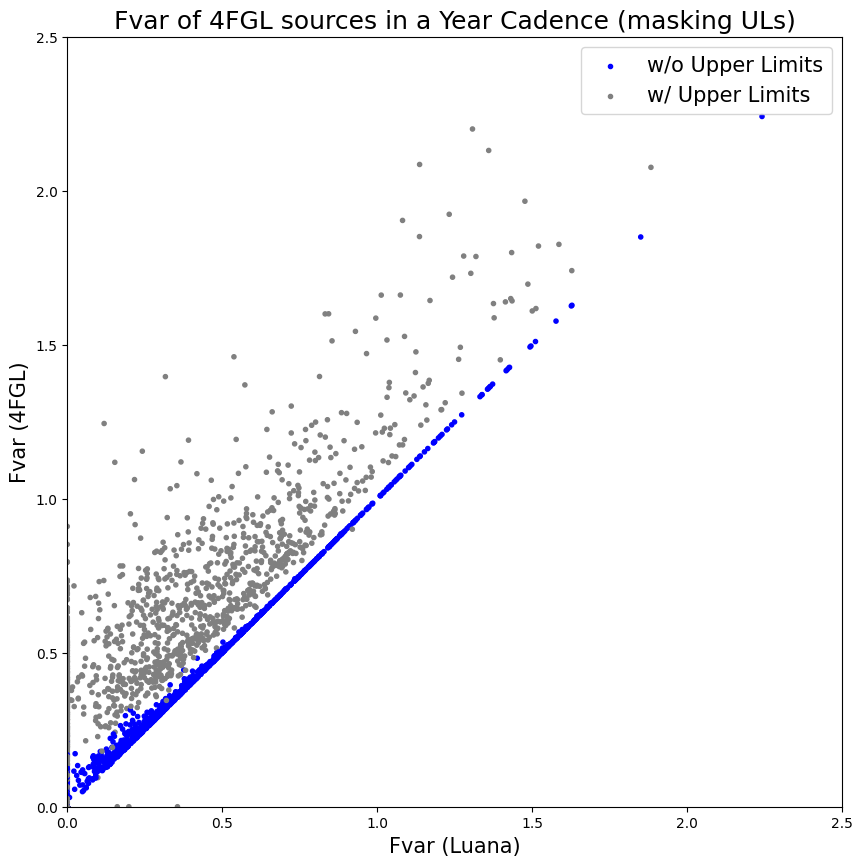

In [26]:
## Fvar 4FGL vs. Luana

plt.figure(figsize=(10, 10))

## Get the color values for the markers based on the Upper_limits column
colors = ['gray' if ul else 'blue' for ul in fvar_Luana['Upper_limits']]

plt.scatter(fvar_Luana['Frac_Variability'], catalog_with_fvar['Frac_Variability'], marker='.', c=colors)

plt.xlabel('Fvar (Luana)', fontsize=15)
plt.ylabel('Fvar (4FGL)', fontsize=15)  ## with Flux_History points
plt.title('Fvar of 4FGL sources in a Year Cadence (masking ULs)', fontsize=18)
# plt.legend()

legend_labels = ['w/o Upper Limits', 'w/ Upper Limits']
legend_handles = [plt.scatter([], [], color='blue', marker='.'), plt.scatter([], [], color='gray', marker='.')]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=15)

plt.xlim(0,2.5)
plt.ylim(0,2.5)

# plt.xscale('log')
# plt.yscale('log')

plt.show()

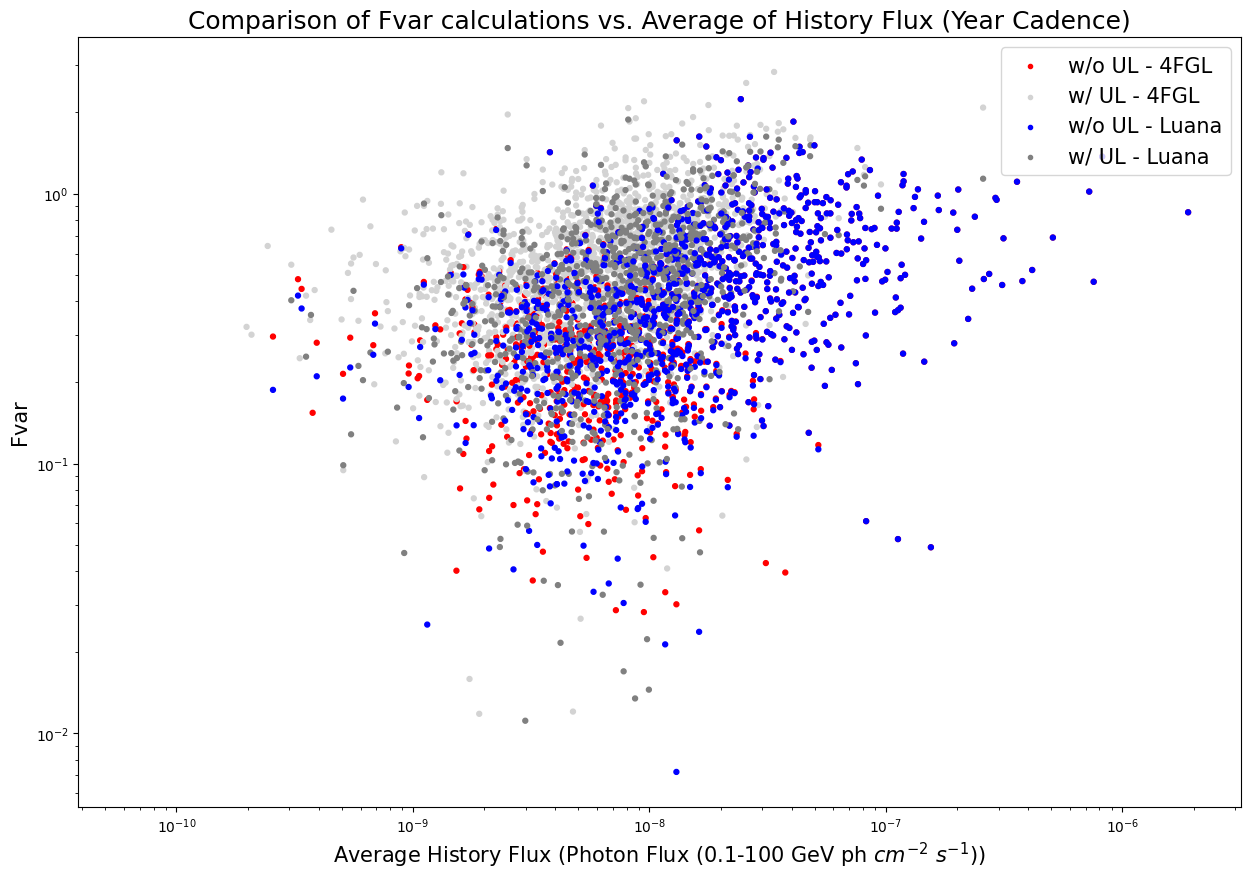

In [27]:
## Plot of Fvar(4FGL) vs average spectrum flux + Fvar(Luana) vs average history flux

## 4FGL
x1 = average_flux
y1 = catalog_with_fvar['Frac_Variability']

## Luana
x2 = average_flux
y2 = fvar_Luana['Frac_Variability']

## Get the color values for the markers based on the Upper_limits column
colors1 = ['lightgray' if ul else 'red' for ul in fvar_Luana['Upper_limits']]
colors2 = ['gray' if ul else 'blue' for ul in fvar_Luana['Upper_limits']]

plt.figure(figsize=(15, 10))

plt.scatter(x1, y1, label='4FGL', marker='.', c=colors1, s=50)
plt.scatter(x2, y2, label='Luana', marker='.', c=colors2, s=50)
plt.title('Comparison of Fvar calculations vs. Average of History Flux (Year Cadence)', fontsize=18)
plt.xlabel('Average History Flux (Photon Flux (0.1-100 GeV ph $cm^{-2}$ $s^{-1}$))', fontsize=15)
plt.ylabel('Fvar', fontsize=15)

legend_labels = ['w/o UL - 4FGL', 'w/ UL - 4FGL', 'w/o UL - Luana', 'w/ UL - Luana']
legend_handles = [plt.scatter([], [], color='red', marker='.'), plt.scatter([], [], color='lightgray', marker='.'),
                 plt.scatter([], [], color='blue', marker='.'), plt.scatter([], [], color='gray', marker='.')]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=15)

plt.xscale('log')
plt.yscale('log')

plt.show()

In [28]:
def test_averaging_catalog_errors(catalog):
    all_fluxes = []
    all_flux_uncs = []
    for entry in catalog:
        fluxes = entry["Flux_History"]
        fluxes_unc = entry["Unc_Flux_History"][:, 1].copy()
        errors = catalog["Unc_Flux_History"][0][:]
        nan_locations = np.where(np.isnan(errors[:,0]))[0]
        for i, err in enumerate(errors):
            if i not in nan_locations:
#                 print(err)
                
                ## Average of errors
#                 fluxes_unc[i] = np.average(np.abs(err), axis=0)

                ## Minimum of errors
#                 fluxes_unc[i] = np.min(np.abs(err), axis=0)

                ## Maximum of errors
                fluxes_unc[i] = np.max(np.abs(err), axis=0)
#                 print(fluxes_unc[i])
            
        all_fluxes.append(fluxes)
        all_flux_uncs.append(fluxes_unc)
    return all_fluxes, all_flux_uncs

In [29]:
catalog_with_average = test_averaging_catalog_errors(catalog_with_flux_history)

# catalog_with_average

In [30]:
# catalog_with_average[0]

In [31]:
# catalog_with_average[1]

In [32]:
## Calculating F_var for each source

source_names_4FGL = []
source_has_UL_4FGL = []

## Masking Upper Limits
f_var_4FGL_no_UL = []
f_var_unc_4FGL_no_UL = []
average_flux_4FGL_no_UL = []

## Keeping UL and selecting the higher uncertainty
f_var_4FGL_w_UL = []
f_var_unc_4FGL_w_UL = []
average_flux_4FGL_w_UL = []

catalog_with_average = test_averaging_catalog_errors(catalog_with_flux_history)


for i in range(len(catalog_with_flux_history)):
    
    ## Selecting each source by name
    select_source = catalog_with_flux_history['Source_Name'][i]
    source_names_4FGL.append(f'{select_source}')
    
    ## Selecting the dataframe of the selected source
    source_df = catalog_with_flux_history[catalog_with_flux_history['Source_Name'] == f'{select_source}']

    ## Defining Flux Points and Uncertainties
    source_flux_history = source_df['Flux_History'][0][:]
    source_unc_flux = source_df['Unc_Flux_History'][0][:]
    
    ## True or False for ULs
    any_nan = np.isnan(source_df['Unc_Flux_History'][0][:,0])
    if any(any_nan):
        source_has_UL_4FGL.append(True) 
    else:
        source_has_UL_4FGL.append(False)
        
    
    ## Masking Upper Limits
    
    ## Creating a mask for upper limits
    mask_this_source = np.invert(np.isnan(source_df['Unc_Flux_History'][0][:,0]))
    ## Selecting the values that are not Upper Limits
    source_flux_history_no_UL = source_df['Flux_History'][0][mask_this_source]
    ## Choose the positive uncertainties (seems larger)
    source_unc_flux_no_UL = source_df['Unc_Flux_History'][0][:,1][mask_this_source]
    
        
    ## Keeping UL and selecting the higher uncertainty
    source_flux_history_w_UL = source_flux_history
    source_unc_flux_w_UL = source_df['Unc_Flux_History'][0][:,1]
    
    
    #### Averaging Error ###
#     source_flux_history = catalog_with_average[0][i]
#     source_unc_flux = catalog_with_average[1][i]
    ########################
    
    
    ## Masking Upper Limits
    sigma_nxs_no_UL, unc_sigma_nxs_no_UL, fvar_source_no_UL, fvar_unc_source_no_UL = calculate_Fvar(source_flux_history_no_UL, source_unc_flux_no_UL)
    
    f_var_4FGL_no_UL.append(fvar_source_no_UL)
    f_var_unc_4FGL_no_UL.append(fvar_unc_source_no_UL)
    average_flux_4FGL_no_UL.append(np.average(source_unc_flux_no_UL))

    
    ## Keeping UL and selecting the higher uncertainty
    sigma_nxs_w_UL, unc_sigma_nxs_w_UL, fvar_source_w_UL, fvar_unc_source_w_UL = calculate_Fvar(source_flux_history_w_UL, source_unc_flux_w_UL)
    
    f_var_4FGL_w_UL.append(fvar_source_w_UL)
    f_var_unc_4FGL_w_UL.append(fvar_unc_source_w_UL)
    average_flux_4FGL_w_UL.append(np.average(source_flux_history_w_UL))

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_10181/2178609889.py:36: RuntimeWarning: invalid value encountered in sqrt
  unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * normalized_excess_variance) )



the source has only 1 flux point selected!


In [33]:
len(source_names_4FGL)

3511

In [34]:
# f_var_4FGL_no_UL

In [35]:
# f_var_4FGL_w_UL

In [36]:
# ## Save the arrays with F_var information to a file

# ## Masking Upper Limits
# np.savez('Fvar_year_no_UL.npz', array1=source_names_4FGL, array2=f_var_4FGL_no_UL, array3=f_var_unc_4FGL_no_UL, array4=average_flux_4FGL_no_UL)

# ## Keeping UL and selecting the higher uncertainty
# np.savez('Fvar_year_w_UL.npz', array1=source_names_4FGL, array2=f_var_4FGL_w_UL, array3=f_var_unc_4FGL_w_UL, array4=average_flux_4FGL_w_UL)

In [37]:
## The sources with UL values (small ones) - taking the higher uncertainty

fvar_Luana_4FGL = pd.DataFrame({'Source_Name': source_names_4FGL, 'Frac_Variability': f_var_4FGL_w_UL,
                                'Unc_Frac_Variability': f_var_unc_4FGL_w_UL, 'Upper_limits': source_has_UL_4FGL})

fvar_Luana_4FGL

,Source_Name,Frac_Variability,Unc_Frac_Variability,Upper_limits
0,J0001.2+4741,0.613565,0.413853,True
1,J0001.2-0747,0.328835,0.073654,False
2,J0001.5+2113,1.054583,0.023527,False
3,J0001.6-4156,0.300242,0.165264,False
4,J0002.1-6728,0.257381,0.209358,False
...,...,...,...,...
3506,J2359.1+1719,0.000000,0.100000,True
3507,J2359.2-3134,1.221221,0.136355,True
3508,J2359.3+0215,0.000000,0.100000,True
3509,J2359.3-2049,0.000000,0.100000,False


In [38]:
catalog_with_fvar

Source_Name,Frac_Variability,Unc_Frac_Variability
str18,float32,float32
J0001.2+4741,0.69284904,0.40699458
J0001.2-0747,0.33279318,0.108399756
J0001.5+2113,1.0545832,0.24980173
J0001.6-4156,0.32796606,0.17213507
J0002.1-6728,0.30663496,0.19210596
J0002.3-0815,0.31231728,0.72063845
...,...,...
J2359.0+3922,0.8606212,0.25553405
J2359.0-3038,0.15399826,0.17869046


In [39]:
# mask = catalog_with_fvar['Unc_Frac_Variability'] == 10

# catalog_with_fvar[mask]

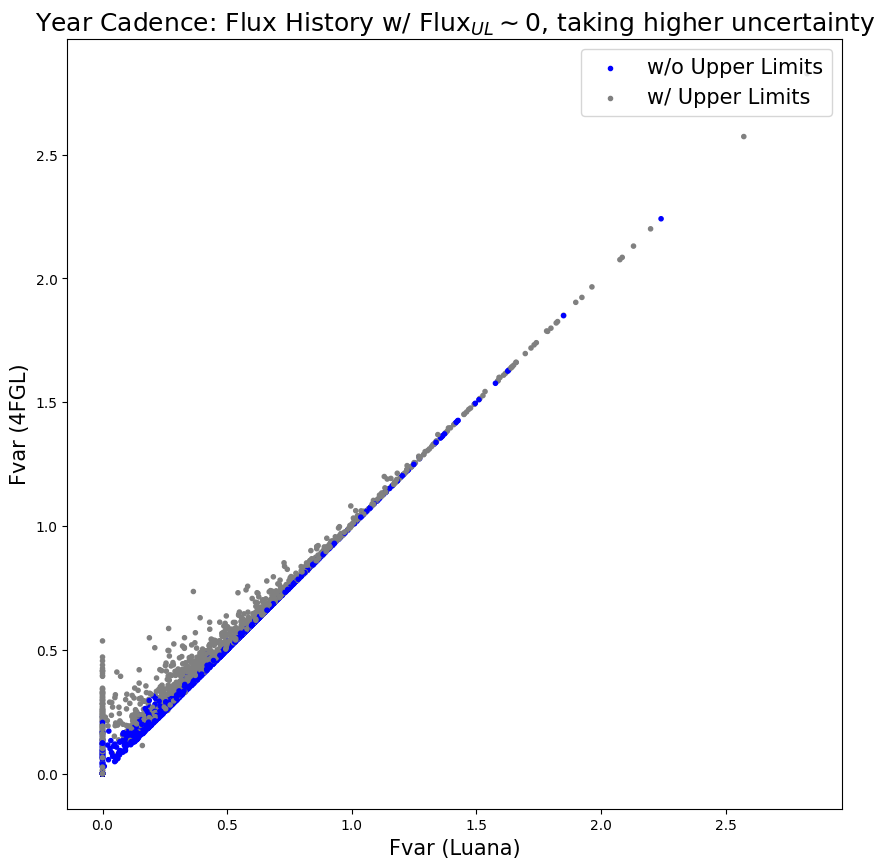

In [40]:
## Fvar 4FGL vs. Luana

plt.figure(figsize=(10, 10))


######## with UL ########
## Get the color values for the markers based on the Upper_limits column
colors = ['gray' if ul else 'blue' for ul in fvar_Luana_4FGL['Upper_limits']]
plt.scatter(fvar_Luana_4FGL['Frac_Variability'], catalog_with_fvar['Frac_Variability'], marker='.', c=colors)
#########################


######### no UL #########
# plt.scatter(fvar_Luana_4FGL['Frac_Variability'], catalog_with_fvar['Frac_Variability'], marker='.')
#########################

plt.xlabel('Fvar (Luana)', fontsize=15) ## with Flux_History points
plt.ylabel('Fvar (4FGL)', fontsize=15)
plt.title('Year Cadence: Flux History w/ Flux$_{UL} \sim 0$, taking higher uncertainty', fontsize=18)

legend_labels = ['w/o Upper Limits', 'w/ Upper Limits']
legend_handles = [plt.scatter([], [], color='blue', marker='.'), plt.scatter([], [], color='gray', marker='.')]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=15)

# plt.xlim(0,2.5)
# plt.ylim(0,2.5)

# plt.xscale('log')
# plt.yscale('log')

plt.show()

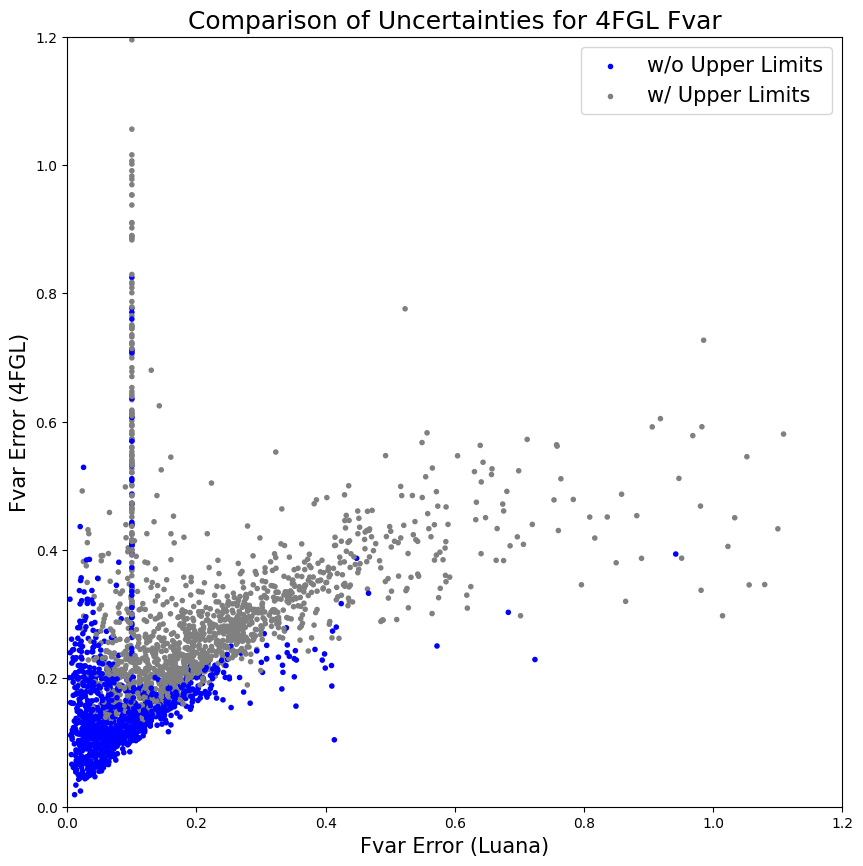

In [41]:
## Fvar 4FGL vs. Luana

plt.figure(figsize=(10, 10))

# Get the color values for the markers based on the Upper_limits column
colors = ['gray' if ul else 'blue' for ul in fvar_Luana_4FGL['Upper_limits']]
plt.scatter(fvar_Luana_4FGL['Unc_Frac_Variability'], catalog_with_fvar['Unc_Frac_Variability'], marker='.', c=colors)

plt.xlabel('Fvar Error (Luana)', fontsize=15)
plt.ylabel('Fvar Error (4FGL)', fontsize=15)  ## with Flux_History points
plt.title('Comparison of Uncertainties for 4FGL Fvar', fontsize=18)

legend_labels = ['w/o Upper Limits', 'w/ Upper Limits']
legend_handles = [plt.scatter([], [], color='blue', marker='.'), plt.scatter([], [], color='gray', marker='.')]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=15)

plt.xlim(0,1.2)
plt.ylim(0,1.2)

# plt.xscale('log')
# plt.yscale('log')

plt.show()

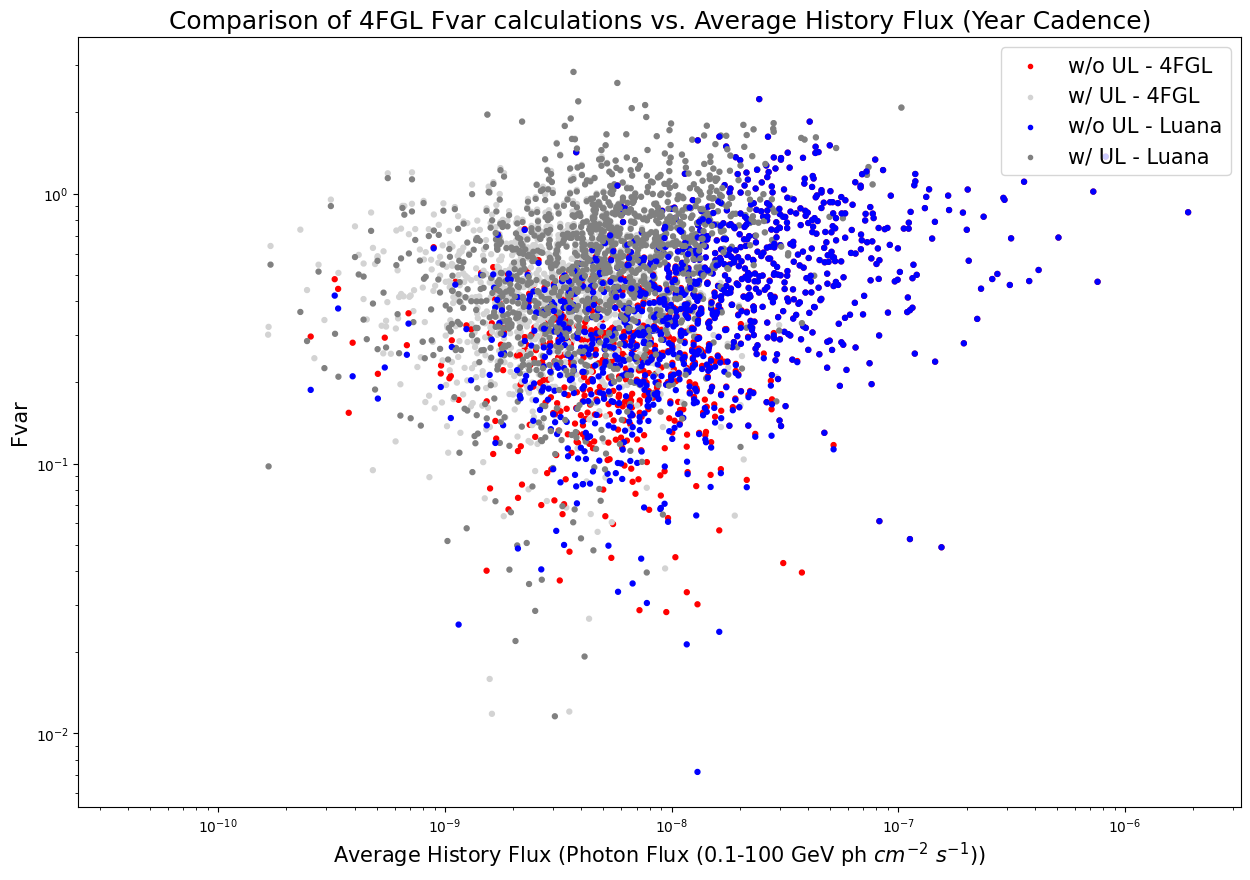

In [42]:
## Plot of Fvar(4FGL) vs average spectrum flux + Fvar(Luana) vs average history flux

## 4FGL
x1 = average_flux_4FGL_w_UL
y1 = catalog_with_fvar['Frac_Variability']

## Luana
x2 = average_flux_4FGL_w_UL
y2 = fvar_Luana_4FGL['Frac_Variability']

## Get the color values for the markers based on the Upper_limits column
colors1 = ['lightgray' if ul else 'red' for ul in fvar_Luana_4FGL['Upper_limits']]
colors2 = ['gray' if ul else 'blue' for ul in fvar_Luana_4FGL['Upper_limits']]

plt.figure(figsize=(15, 10))

plt.scatter(x1, y1, marker='.', c=colors1, s=50, label='4FGL')
plt.scatter(x2, y2, marker='.', c=colors2, s=50, label='Luana')
plt.title('Comparison of 4FGL Fvar calculations vs. Average History Flux (Year Cadence)', fontsize=18)
plt.xlabel('Average History Flux (Photon Flux (0.1-100 GeV ph $cm^{-2}$ $s^{-1}$))', fontsize=15)
plt.ylabel('Fvar', fontsize=15)
plt.legend(fontsize=15)

legend_labels = ['w/o UL - 4FGL', 'w/ UL - 4FGL', 'w/o UL - Luana', 'w/ UL - Luana']
legend_handles = [plt.scatter([], [], color='red', marker='.'), plt.scatter([], [], color='lightgray', marker='.'),
                 plt.scatter([], [], color='blue', marker='.'), plt.scatter([], [], color='gray', marker='.')]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=15)

plt.xscale('log')
plt.yscale('log')

plt.show()

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_10181/3123312235.py:5: RuntimeWarning: divide by zero encountered in divide
  y1 = catalog_with_fvar['Unc_Frac_Variability'] / catalog_with_fvar['Frac_Variability']


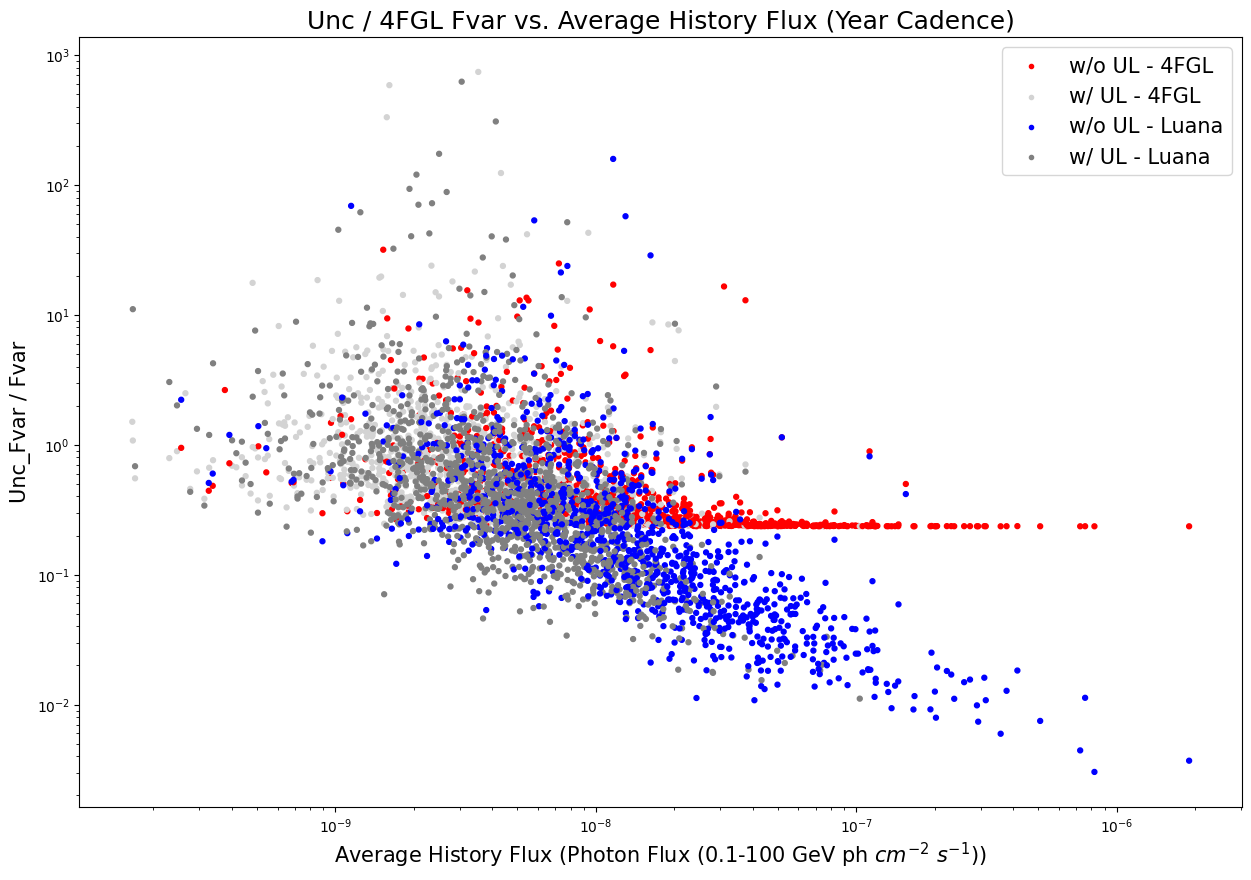

In [43]:
## Plot of Fvar(4FGL) vs average spectrum flux + Fvar(Luana) vs average history flux

## 4FGL
x1 = average_flux_4FGL_w_UL
y1 = catalog_with_fvar['Unc_Frac_Variability'] / catalog_with_fvar['Frac_Variability']

## Luana
x2 = average_flux_4FGL_w_UL
y2 = fvar_Luana_4FGL['Unc_Frac_Variability'] / fvar_Luana_4FGL['Frac_Variability']

## Get the color values for the markers based on the Upper_limits column
colors1 = ['lightgray' if ul else 'red' for ul in fvar_Luana_4FGL['Upper_limits']]
colors2 = ['gray' if ul else 'blue' for ul in fvar_Luana_4FGL['Upper_limits']]

plt.figure(figsize=(15, 10))

plt.scatter(x1, y1, marker='.', c=colors1, s=50, label='4FGL')
plt.scatter(x2, y2, marker='.', c=colors2, s=50, label='Luana')
plt.title('Unc / 4FGL Fvar vs. Average History Flux (Year Cadence)', fontsize=18)
plt.xlabel('Average History Flux (Photon Flux (0.1-100 GeV ph $cm^{-2}$ $s^{-1}$))', fontsize=15)
plt.ylabel('Unc_Fvar / Fvar', fontsize=15)
plt.legend(fontsize=15)

legend_labels = ['w/o UL - 4FGL', 'w/ UL - 4FGL', 'w/o UL - Luana', 'w/ UL - Luana']
legend_handles = [plt.scatter([], [], color='red', marker='.'), plt.scatter([], [], color='lightgray', marker='.'),
                 plt.scatter([], [], color='blue', marker='.'), plt.scatter([], [], color='gray', marker='.')]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=15)

plt.xscale('log')
plt.yscale('log')

plt.show()

## Examples Tarek:

Value "nan" in the uncertainties means that it is an upper limit point

In [44]:
catalog_with_flux_history['Flux_History'][0]

array([3.2381073e-09, 6.2654388e-09, 5.3481841e-09, 7.9557583e-14,
       6.5167382e-15, 3.0029751e-14, 3.4034604e-09, 1.1556166e-09,
       2.0116395e-09, 3.7488209e-13], dtype=float32)

In [45]:
catalog_with_flux_history['Unc_Flux_History'][0]

array([[-1.7942571e-09,  2.0774948e-09],
       [-1.8782995e-09,  2.1424658e-09],
       [-1.9150088e-09,  2.1906275e-09],
       [           nan,  1.3167837e-09],
       [           nan,  1.6244933e-09],
       [           nan,  2.3319167e-09],
       [-1.9609092e-09,  2.3040045e-09],
       [           nan,  1.6207169e-09],
       [-1.2986654e-09,  1.6936006e-09],
       [           nan,  1.8192396e-09]], dtype=float32)

In [46]:
## Extracting flux points and errors

## Values that are not upper limits
mask = np.invert(np.isnan(catalog_with_flux_history['Unc_Flux_History'][0][:,0]))
## Flux points
flux = catalog_with_flux_history['Flux_History'][0][mask]
## Uncertainties taken from the positive one (seems larger)
flux_unc = catalog_with_flux_history['Unc_Flux_History'][0][:,1][mask]

## Extracting Upper Limit points
ul_mask = np.isnan(catalog_with_flux_history['Unc_Flux_History'][0][:,0])
flux_uls = catalog_with_flux_history['Unc_Flux_History'][0][:,1][ul_mask]

In [47]:
flux

array([3.2381073e-09, 6.2654388e-09, 5.3481841e-09, 3.4034604e-09,
       2.0116395e-09], dtype=float32)

In [48]:
flux_unc

array([2.0774948e-09, 2.1424658e-09, 2.1906275e-09, 2.3040045e-09,
       1.6936006e-09], dtype=float32)

In [49]:
flux_uls

array([1.3167837e-09, 1.6244933e-09, 2.3319167e-09, 1.6207169e-09,
       1.8192396e-09], dtype=float32)

## For different Blazar Classes (Synchrotron for now)

In [50]:
dataLSP = catalog_data[catalog_data['SED_class'] == 'LSP']
dataISP = catalog_data[catalog_data['SED_class'] == 'ISP']
dataHSP = catalog_data[catalog_data['SED_class'] == 'HSP']

In [51]:
dataLSP

Source_Name,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,SED_class,Flux1000,Unc_Flux1000,Frac_Variability,Unc_Frac_Variability
str18,str17,float32,float32,float32,float32,float32,float32,str3,float32,float32,float32,float32
J0001.2-0747,PowerLaw,1612.6141,3.3465656e-13,2.1049428,3.5833494e-13,2.0718932,0.04876986,LSP,8.2320506e-10,5.6777423e-11,0.33279318,0.108399756
J0002.3-0815,PowerLaw,3959.9126,7.564005e-15,1.9895958,9.510118e-15,1.9282347,0.15012589,LSP,1.1693464e-10,3.32925e-11,0.31231728,0.72063845
J0003.2+2207,PowerLaw,2572.9114,2.0326285e-14,2.210459,2.4485845e-14,0.7698703,0.99968916,LSP,1.3514474e-10,3.3926677e-11,0.0,10.0
J0003.3-1928,LogParabola,953.7989,4.970213e-13,2.2775729,6.135522e-13,2.0584412,0.24640359,LSP,4.0164658e-10,4.4221696e-11,0.6441291,0.18886401
J0003.9-1149,LogParabola,1677.4374,1.08234236e-13,2.0871086,1.464613e-13,1.9320688,0.27118722,LSP,3.505177e-10,4.4482935e-11,0.0,10.0
J0004.3+4614,PowerLaw,917.12274,4.776886e-13,2.584969,5.144357e-13,2.526971,0.06729238,LSP,2.4093677e-10,3.923831e-11,1.0609995,0.30065805
...,...,...,...,...,...,...,...,...,...,...,...,...
J2358.0-4601,PowerLaw,662.7951,1.0244216e-12,2.58189,9.821101e-13,2.6041126,-0.031504635,LSP,2.2388312e-10,3.065953e-11,0.5401745,0.17009144
J2358.3-1021,PowerLaw,574.9515,4.0763955e-12,2.5930922,4.45531e-12,2.5634255,0.083448544,LSP,6.0904953e-10,4.8685552e-11,0.66040826,0.16569799


In [52]:
print('# of sources in:')

print('\ndataLSP:', len(dataLSP))
print('dataISP:', len(dataISP))
print('dataHSP:', len(dataHSP))

print('\ndataLSP + dataISP + dataHSP:', len(dataLSP) + len(dataISP) + len(dataHSP))
print('catalog_data:', len(catalog_data))
print('are they equal?', len(dataLSP) + len(dataISP) + len(dataHSP) == len(catalog_data))

print('\n--> difference between tables:', len(catalog_data) - (len(dataLSP)+len(dataISP)+len(dataHSP)), 'SOURCES DO NOT HAVE A SED_class REGISTERED')

# of sources in:

dataLSP: 1538
dataISP: 508
dataHSP: 548

dataLSP + dataISP + dataHSP: 2594
catalog_data: 3511
are they equal? False

--> difference between tables: 917 SOURCES DO NOT HAVE A SED_class REGISTERED


In [53]:
# ## Saving the dataframes as .csv tables

# LSP_pandas = dataLSP.to_pandas()
# ISP_pandas = dataISP.to_pandas()
# HSP_pandas = dataHSP.to_pandas()
# whole_data_pandas = catalog_data.to_pandas()

# LSP_pandas.to_csv('LSP_data.csv', index=False)
# ISP_pandas.to_csv('ISP_data.csv', index=False)
# HSP_pandas.to_csv('HSP_data.csv', index=False)
# whole_data_pandas.to_csv('catalog_data.csv', index=False)